<h1>Exercise 2 </h1>

<p>Aditya Iqbal Bagaskara</p>

<h2>Importing libraries and define functions </h2>

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from random import random, randint, choice
from random import choice
from scipy.stats import multivariate_normal

def unpickle(file):
    with open(file, 'rb') as f:
        dict = pickle.load(f, encoding="latin1")
    return dict

def class_acc(pred, gt):
    correctAnswer = 0
    correctLabel = []
    for i in range(0, len(pred)):
        if(label_names[pred[i]] == label_names[gt[i]]):
            correctLabel = np.append(correctLabel, label_names[gt[i]])
            corectAnswer = correctAnswer + 1
    
    accuracy = len(correctLabel)/len(gt)
    return accuracy

def cifar10_classifier_random(x):
    rand_label = []
    for i in range(0, len(x)):
        rl = randint(0, 9)
        rand_label = np.append(rand_label, rl)
    return rand_label.astype(int) 

def manh_distance(p1,p2):
    d = np.sum(abs(p1-p2),0)
    return d

def eucl_dist(p1,p2):
    d = np.sqrt(np.sum((p1-p2)**2,0))
    return d

def cifar10_classifier_1nn(x,trdata,trlabels):
    pred_label_arr = []
    
    for i in range(0, len(x)):
        distance_arr = []
        for j in range(0,len(trdata)):
            d = manh_distance(x[i], trdata[j])
            distance_arr = np.append(distance_arr,d )
        
        min_index = np.argmin(distance_arr)
        pred_label_arr = np.append(pred_label_arr, trlabels[min_index]).astype(int)

        
    return pred_label_arr

def merge(dict1, dict2):
    return(dict2.update(dict1))


<h2> Load the Training Data and Test Data </h2>



In [2]:
from collections import defaultdict
datadict = unpickle('cifar-10-batches-py/data_batch_1')
datadict2 = unpickle('cifar-10-batches-py/data_batch_2')
datadict3 = unpickle('cifar-10-batches-py/data_batch_3')
datadict4 = unpickle('cifar-10-batches-py/data_batch_4')
datadict5 = unpickle('cifar-10-batches-py/data_batch_5')
datadict_test = unpickle('cifar-10-batches-py/test_batch')

dd = defaultdict(list)

for d in (datadict, datadict2, datadict3, datadict4, datadict5): # you can list as many input dicts as you want here
    for key, value in d.items():
        dd[key].append(value)
        
X_train = dd["data"]
Y_train = dd["labels"]


X_train = np.concatenate((dd["data"][0],dd["data"][1],dd["data"][2],dd["data"][3],dd["data"][4]), axis=0)
Y_train = np.concatenate((dd["labels"][0],dd["labels"][1],dd["labels"][2],dd["labels"][3],dd["labels"][4]), axis=0)


X_test = datadict_test["data"]
Y_test = datadict_test["labels"]


labeldict = unpickle('cifar-10-batches-py/batches.meta')
label_names = labeldict["label_names"]

X_train = X_train.reshape(len(X_train), 3, 32, 32).transpose(0,2,3,1).astype("int64")
X_test = X_test.reshape(len(X_test), 3, 32, 32).transpose(0,2,3,1).astype("int64")

Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

<h2> Show some images randomly </h2>
<h4> Task 1 </h4>

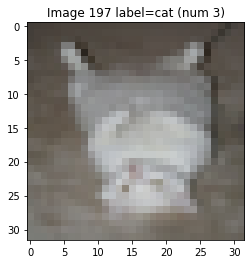

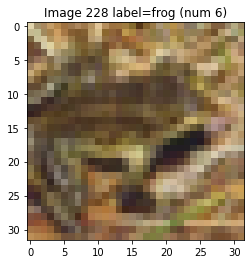

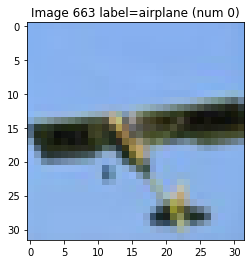

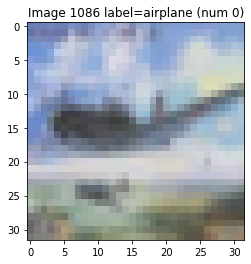

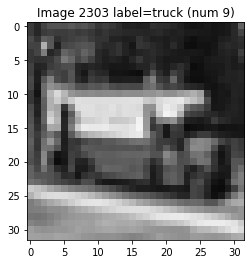

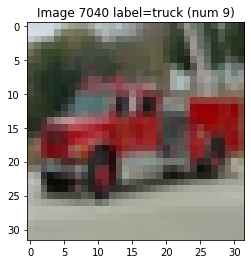

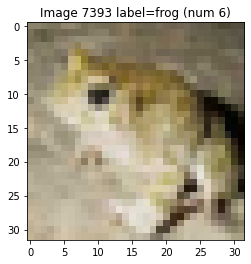

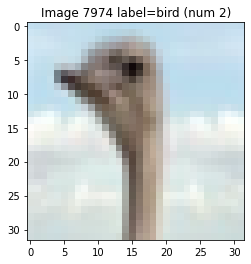

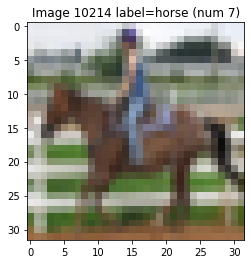

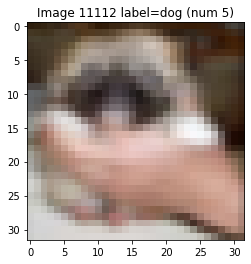

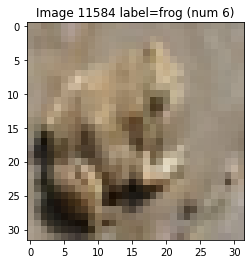

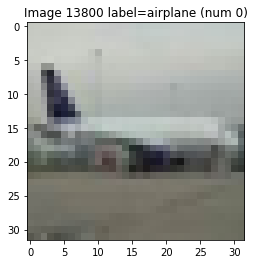

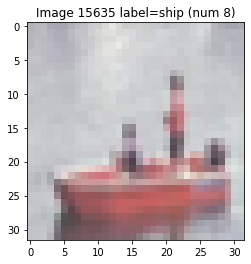

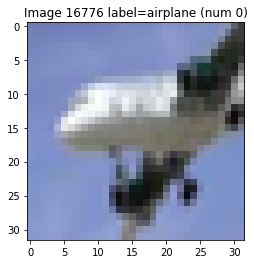

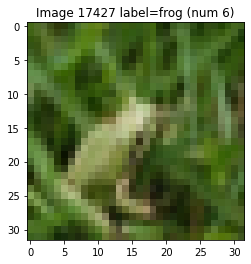

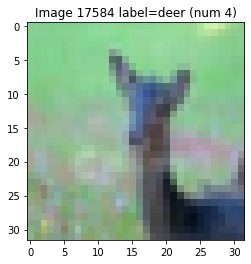

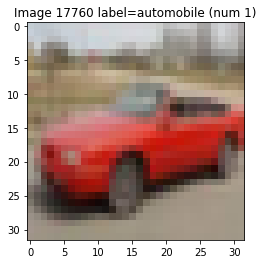

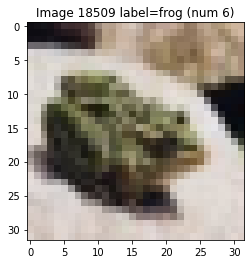

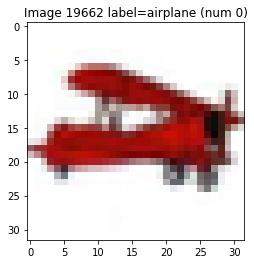

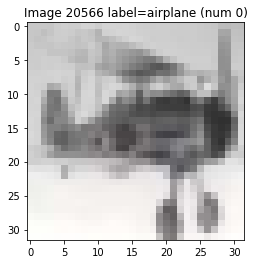

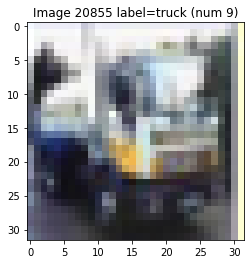

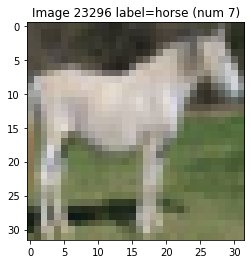

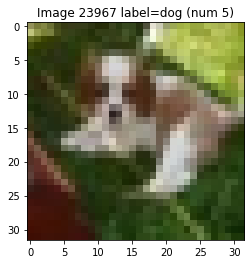

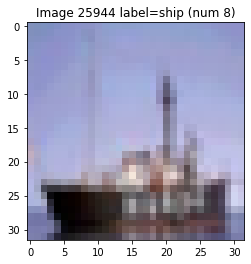

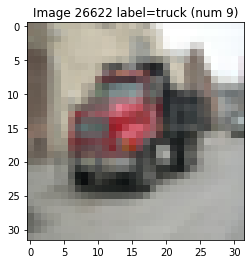

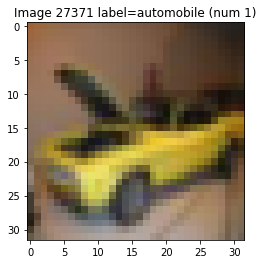

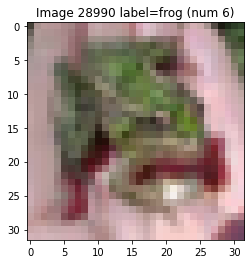

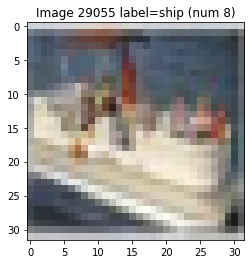

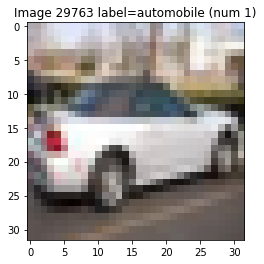

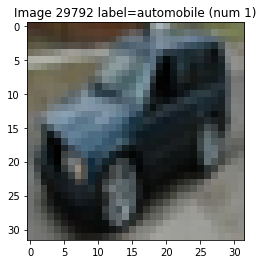

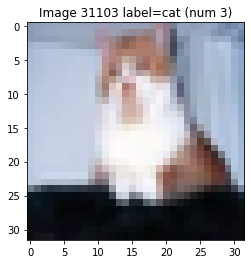

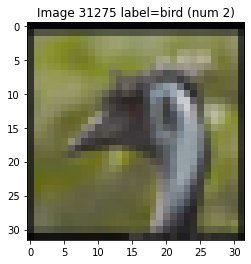

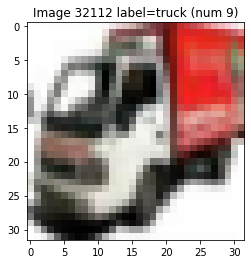

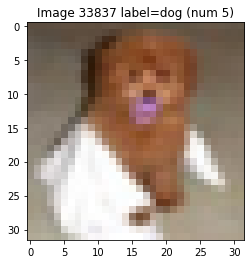

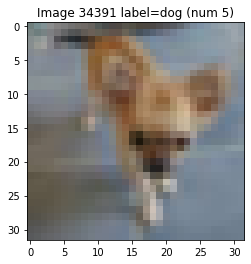

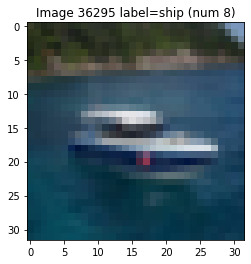

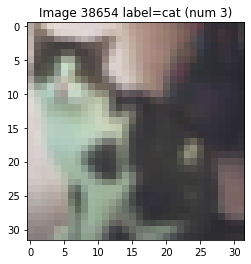

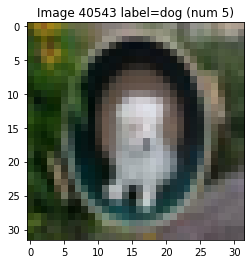

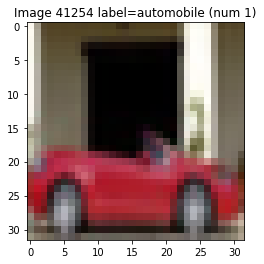

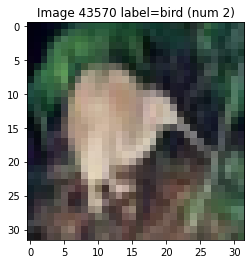

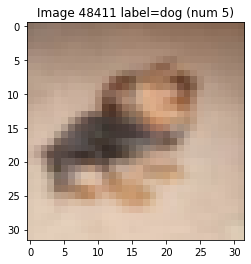

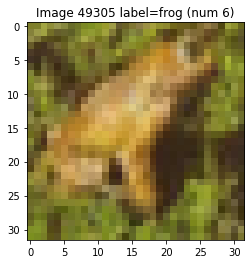

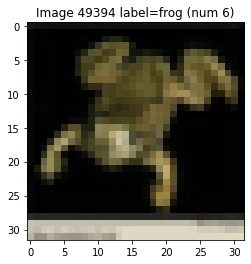

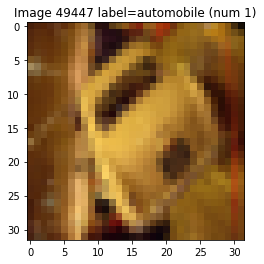

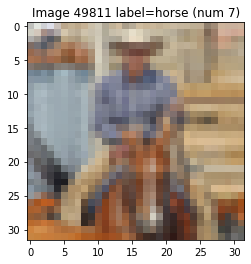

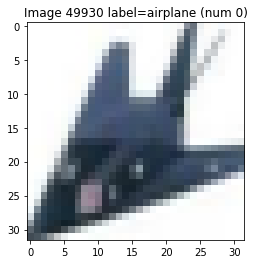

In [7]:
for i in range(X_train.shape[0]):
    
    if random() > 0.999:
        plt.figure(1);
        plt.clf()
        plt.imshow(X_train[i])
        plt.title(f"Image {i} label={label_names[Y_train[i]]} (num {Y_train[i]})")
        plt.pause(1)
        


<h2>Test that the class accuracy function works </h2>
<h4>Task 2</h4>


In [8]:
accuracy_func_test = class_acc(Y_test, Y_test)
print(f'Accuracy function tes: {accuracy_func_test*100}%')

Accuracy function tes: 100.0%


<h2>Create a random choice prediction </h2>
<h4>Task 3 </h4>

In [2]:
rand_label = cifar10_classifier_random(X_train)
acc_rand = class_acc(rand_label,Y_train )
print(f'Accuracy of random classifier: {acc_rand*100}%')

NameError: name 'X_train' is not defined

<h1> 1-NN Classifier </h1>
<h4> Task 4 </h4>
<p>The function for 1-NN classifier can be found on the first cell. We can change the type of distance between Manhattan or Eucledian. The number thetraining data are adjusted / reduced during the development stage </p>

In [ ]:

num_training = len(X_train)
X_train = X_train[:num_training]
Y_train = Y_train[:num_training]

num_test = len(X_test)
X_test = X_test[:num_test]
Y_test = Y_test[:num_test]

X_train = np.reshape(X_train,(num_training,3072))/255
X_test = np.reshape(X_test,(num_test,3072))/255

res_1nn = (cifar10_classifier_1nn(X_test, X_train, Y_train ))
acc_1nn = class_acc(res_1nn, Y_test)

In [ ]:
print(f'The accuracy of 1-NN Classifier: {acc_1nn*100}%')
print(f'Number of Training: {num_training}')
print(f'Number of Test: {num_test}')